<a href="https://colab.research.google.com/github/HRJ369/DH_307/blob/main/DH_307_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/HRJ369/DH_307/main/s10_run_ppg(Sheet1).csv'
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(df.head())




      time  pleth_1
0  22:48.3    65589
1  22:48.3    65589
2  22:48.3    65595
3  22:48.3    65591
4  22:48.3    65583


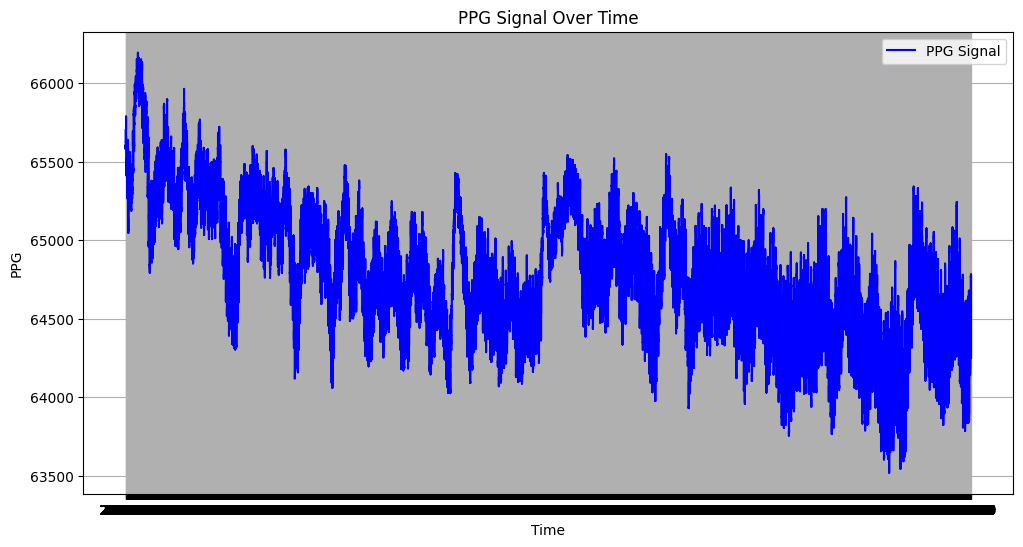

In [6]:
# Adjust these column names based on your dataset
time_column = 'time'  # Replace with the actual name of the time column
ppg_column = 'pleth_1'    # Replace with the actual name of the PPG column

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(df[time_column], df[ppg_column], color='blue', label='PPG Signal')
plt.title('PPG Signal Over Time')
plt.xlabel('Time')
plt.ylabel('PPG')
plt.legend()
plt.grid()
plt.show()


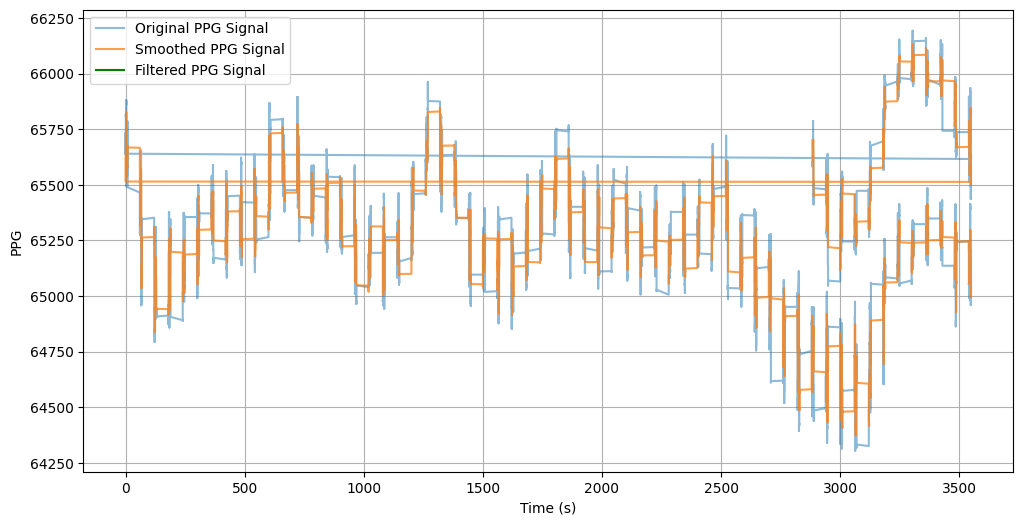

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# Load the dataset
url = 'https://raw.githubusercontent.com/HRJ369/DH_307/main/s10_run_ppg(Sheet1).csv'
df = pd.read_csv(url)

# Rename columns if necessary
df.columns = ['time', 'pleth_1']

# Convert time to a numeric value (in seconds)
df['time_numeric'] = pd.to_datetime(df['time'], format='%H:%M.%S', errors='coerce').dt.minute * 60 + pd.to_datetime(df['time'], format='%H:%M.%S', errors='coerce').dt.second
df = df.dropna(subset=['time_numeric'])  # Drop rows where time conversion failed

# Extract time and PPG signal
time = df['time_numeric']
ppg_signal = df['pleth_1']

# 1. Smoothing the signal using a moving average filter
window_size = int(500 * 0.2)  # 0.2-second window, adjust for smoothing
smoothed_signal = ppg_signal.rolling(window=window_size).mean()

# 2. Apply a bandpass filter to remove baseline drift and noise
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Bandpass filter parameters
lowcut = 0.5  # Hz
highcut = 3.0  # Hz
sampling_rate = 500  # Sampling rate in Hz

# Apply bandpass filter
filtered_signal = bandpass_filter(smoothed_signal.dropna(), lowcut, highcut, sampling_rate)

# Plot the original, smoothed, and filtered signals, and detected peaks
plt.figure(figsize=(12, 6))
plt.plot(time, ppg_signal, label='Original PPG Signal', alpha=0.5)
plt.plot(time[window_size - 1:], smoothed_signal[window_size - 1:], label='Smoothed PPG Signal', alpha=0.75)
plt.plot(time[window_size - 1:], filtered_signal, label='Filtered PPG Signal', color='green')
plt.xlabel('Time (s)')
plt.ylabel('PPG')
plt.legend()
plt.grid()
plt.show()


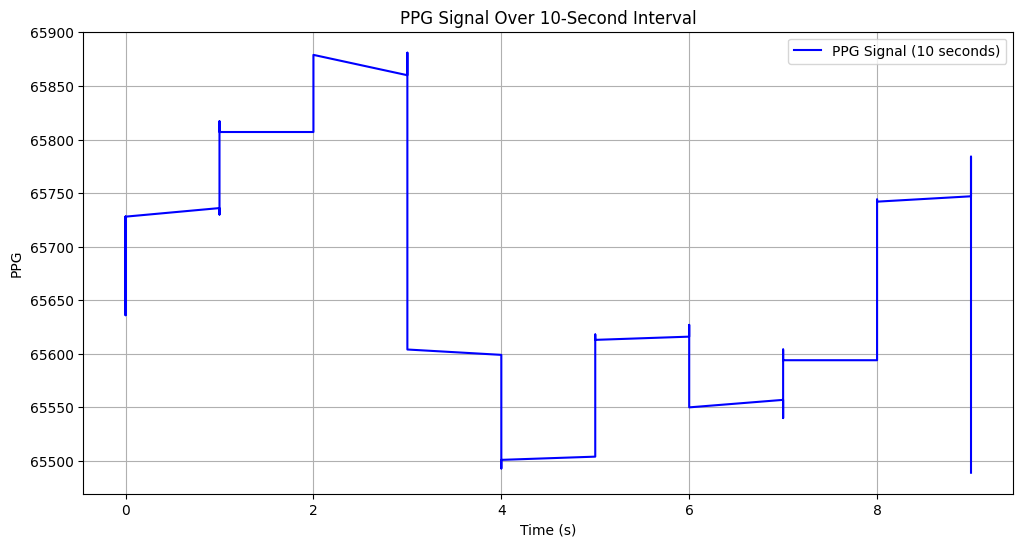

In [22]:
# Filter the data for a 10-second interval
start_time = df['time_numeric'].min()
end_time = start_time + 10  # 10 seconds interval

# Select the data within the specified time range
df_10sec = df[(df['time_numeric'] >= start_time) & (df['time_numeric'] <= end_time)]

# Extract time and PPG signal for the 10-second interval
time_10sec = df_10sec['time_numeric']
ppg_signal_10sec = df_10sec['pleth_1']

# Plot the PPG signal for the 10-second interval
plt.figure(figsize=(12, 6))
plt.plot(time_10sec, ppg_signal_10sec, color='blue', label='PPG Signal (10 seconds)')
plt.title('PPG Signal Over 10-Second Interval')
plt.xlabel('Time (s)')
plt.ylabel('PPG')
plt.legend()
plt.grid()
plt.show()


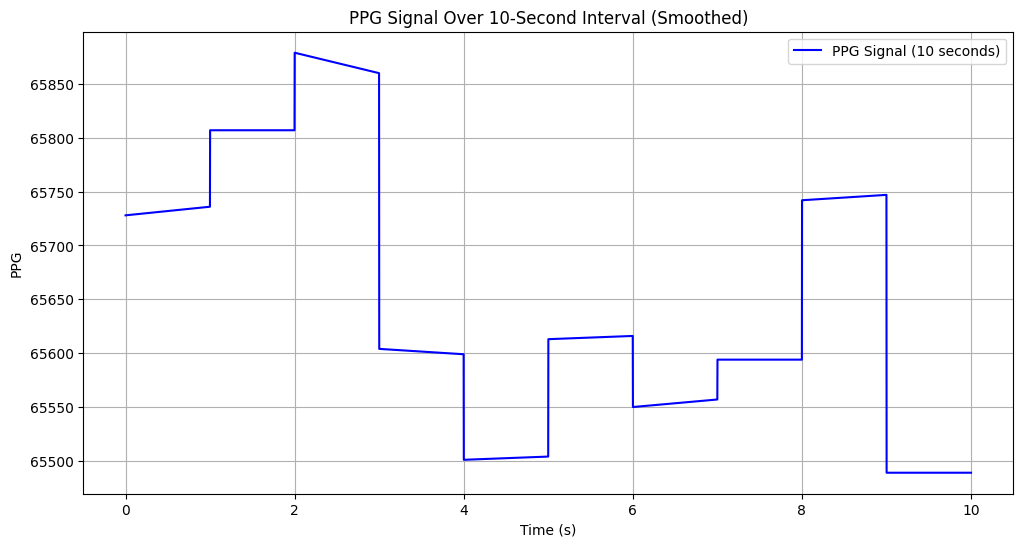

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset (make sure this matches the full path to your CSV file if necessary)
df = pd.read_csv(url)

# Preprocess time column
df['time_numeric'] = pd.to_datetime(df['time'], format='%H:%M.%S', errors='coerce').dt.minute * 60 + \
                     pd.to_datetime(df['time'], format='%H:%M.%S', errors='coerce').dt.second

# Remove any rows where time conversion failed (NaN values)
df = df.dropna(subset=['time_numeric'])

# Select a 10-second interval of the PPG data for plotting
start_time = df['time_numeric'].min()
end_time = start_time + 10
df_10sec = df[(df['time_numeric'] >= start_time) & (df['time_numeric'] <= end_time)]

# Resample the data to a uniform time grid (using linear interpolation)
time_uniform = np.linspace(start_time, end_time, num=5000)  # 5000 points for smoothness
ppg_interpolated = np.interp(time_uniform, df_10sec['time_numeric'], df_10sec['pleth_1'])

# Plot the interpolated PPG signal
plt.figure(figsize=(12, 6))
plt.plot(time_uniform, ppg_interpolated, color='blue', label='PPG Signal (10 seconds)')
plt.title('PPG Signal Over 10-Second Interval (Smoothed)')
plt.xlabel('Time (s)')
plt.ylabel('PPG')
plt.legend()
plt.grid()
plt.show()
